# **Plan de Acción: De Archivo a DataFrame**

"¿Cómo podemos reducir el
consumo energético residencial en un porcentaje ambicioso pero alcanzable, por
ejemplo, un 5-10%, en la Región Metropolitana para fines del próximo año,
identificando los factores socioeconómicos y climáticos más influyentes a través del
análisis de datos de consumo y precios de la CNE, y cómo podemos predecir estos
consumos para informar estrategias de eficiencia?"

## **1. Datos de consumo energético**

El objetivo es cargar los datos en un entorno programático y realizar un diagnóstico estructural. Usaremos el notebook destinado a este fin.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [15]:
import pandas as pd
import os

# --- Cargar Datos ---
# Construir la ruta al archivo para que funcione en cualquier sistema operativo
ruta_archivo_raw = os.path.join('..', 'data', 'raw', 'consumo_electrico_cne_2024.xlsx')

# Cargar el archivo Excel en un DataFrame de pandas
try:
    df_raw = pd.read_excel(ruta_archivo_raw)

    # --- Diagnóstico Estructural ---
    # 1. Ver las primeras 5 filas para entender las columnas y el formato
    print("--- PRIMERAS 5 FILAS ---")
    display(df_raw.head())

    # 2. Obtener un resumen técnico: número de filas, columnas, tipos de datos y valores nulos
    print("\n--- INFORMACIÓN DEL DATAFRAME ---")
    df_raw.info()

    # 3. Obtener estadísticas descriptivas para las columnas numéricas
    print("\n--- ESTADÍSTICAS DESCRIPTIVAS ---")
    display(df_raw.describe())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {ruta_archivo_raw}")
    print("Asegúrate de haber descargado el archivo y haberlo colocado en la carpeta 'data/raw/'.")

--- PRIMERAS 5 FILAS ---


,anio;mes;region;comuna;tipo_clientes;tarifa;clientes_facturados;e1_kwh;e2_kwh;energia_kwh
0,2015;1;RegiÃ³n del Libertador Gral. Bernardo O...
1,2015;1;RegiÃ³n del Libertador Gral. Bernardo O...
2,2015;1;RegiÃ³n del Libertador Gral. Bernardo O...
3,2015;1;RegiÃ³n del Libertador Gral. Bernardo O...
4,2015;1;RegiÃ³n del Libertador Gral. Bernardo O...



--- INFORMACIÓN DEL DATAFRAME ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490758 entries, 0 to 490757
Data columns (total 1 columns):
 #   Column                                                                                     Non-Null Count   Dtype 
---  ------                                                                                     --------------   ----- 
 0   anio;mes;region;comuna;tipo_clientes;tarifa;clientes_facturados;e1_kwh;e2_kwh;energia_kwh  490758 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB

--- ESTADÍSTICAS DESCRIPTIVAS ---


,anio;mes;region;comuna;tipo_clientes;tarifa;clientes_facturados;e1_kwh;e2_kwh;energia_kwh
count,490758
unique,490753
top,2019;7;RegiÃ³n de La AraucanÃ­a;CuracautÃ­n;No...
freq,2


### ¿Cuántas filas y columnas tiene el dataset?

El dataset tiene 490758 filas y 1 columna.

### Cuáles son los nombres exactos de las columnas? 

El nombre exacto de la única columna del dataset es *anio;mes;region;comuna;tipo_clientes;tarifa;clientes_facturados;e1_kwh;e2_kwh;energia_kwh*.

### ¿Hay alguna columna que debería ser numérica pero está listada como ``object``?

Probablemente existe alguna columna que debería ser numérica, sin embargo, por ahora está toda la información de cada fila juntada como ``object``.

### ¿Hay columnas con una cantidad significativa de valores faltantes (la cuenta de ``non-null`` es mucho menor que el total de entradas)?

Por ahora no, la cuenta de non-null es igual a la cantidad de filas.

### ¿Qué podemos comentar sobre el DataFrame?

El DataFrame actual tiene la forma correcta (490,758 filas) pero la estructura incorrecta (1 columna). La tarea es transformar esa única columna en una tabla útil.

In [16]:
import pandas as pd
import os

ruta_archivo_raw = os.path.join('..', 'data', 'raw', 'consumo_electrico_cne_2024.xlsx')

try:
    # 1. Cargar el archivo Excel tal como está
    df_raw = pd.read_excel(ruta_archivo_raw)

    # --- 2. Transformación: Dividir la única columna ---
    print("--- TRANSFORMANDO DATOS: DE UNA COLUMNA A UNA TABLA ---")

    # Obtener el nombre de la columna original (que contiene los nombres reales)
    original_col_name = df_raw.columns[0]
    
    # Dividir la columna en nuevas columnas usando el punto y coma
    df_processed = df_raw[original_col_name].str.split(';', expand=True)

    # Obtener los nombres correctos de las columnas desde la cabecera original
    column_names = original_col_name.split(';')
    
    # Asignar los nombres correctos a las nuevas columnas
    df_processed.columns = column_names
    
    print("Transformación completada.")

    # --- 3. Diagnóstico sobre el DataFrame transformado ---
    print("\n--- PRIMERAS 5 FILAS (TRANSFORMADO) ---")
    display(df_processed.head())

    print("\n--- INFORMACIÓN DEL DATAFRAME (TRANSFORMADO) ---")
    df_processed.info()

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta especificada: {ruta_archivo_raw}")
except Exception as e:
    print(f"Ocurrió un error al procesar el archivo: {e}")

--- TRANSFORMANDO DATOS: DE UNA COLUMNA A UNA TABLA ---
Transformación completada.

--- PRIMERAS 5 FILAS (TRANSFORMADO) ---


,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh
0,2015,1,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Las Cabras,No Residencial,BT2PP,179,108809,0,108809
1,2015,1,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Las Cabras,No Residencial,AT4.3,128,3241469,0,3241469
2,2015,1,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Las Cabras,No Residencial,AT4.2,14,257092,0,257092
3,2015,1,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Las Cabras,No Residencial,BT2PPP,10,6555,0,6555
4,2015,1,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Las Cabras,No Residencial,BT4.2,1,588,0,588



--- INFORMACIÓN DEL DATAFRAME (TRANSFORMADO) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490758 entries, 0 to 490757
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   anio                 490758 non-null  object
 1   mes                  490758 non-null  object
 2   region               490758 non-null  object
 3   comuna               490758 non-null  object
 4   tipo_clientes        490758 non-null  object
 5   tarifa               490758 non-null  object
 6   clientes_facturados  490758 non-null  object
 7   e1_kwh               490758 non-null  object
 8   e2_kwh               490758 non-null  object
 9   energia_kwh          490758 non-null  object
dtypes: object(10)
memory usage: 37.4+ MB


La estructura ha sido corregida. El problema ahora es semántico.

Como muestra la salida de ``.info()``, cada columna es del tipo object (texto). No se puede realizar ningún cálculo, análisis o modelo sobre texto. La carga estructural fue exitosa, pero los datos son, por ahora, inútiles para el análisis cuantitativo.

In [17]:
# --- 4. Limpieza: Conversión de Tipos de Datos ---
print("--- CONVIRTIENDO TIPOS DE DATOS ---")

# Lista de columnas que deben ser numéricas
columnas_numericas = [
    'anio', 
    'mes', 
    'clientes_facturados', 
    'e1_kwh', 
    'e2_kwh', 
    'energia_kwh'
]

# Iterar y convertir cada columna
for col in columnas_numericas:
    # errors='coerce' transformará los valores no válidos en NaN (Not a Number)
    df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

print("Conversión completada.")

# --- 5. Verificación Final de Tipos ---
print("\n--- INFORMACIÓN DEL DATAFRAME (TIPOS CORREGIDOS) ---")
df_processed.info()

# Opcional: Verificar si se crearon valores nulos durante la conversión
print("\n--- CONTEO DE VALORES NULOS TRAS CONVERSIÓN ---")
print(df_processed.isnull().sum())

--- CONVIRTIENDO TIPOS DE DATOS ---
Conversión completada.

--- INFORMACIÓN DEL DATAFRAME (TIPOS CORREGIDOS) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490758 entries, 0 to 490757
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   anio                 490758 non-null  int64  
 1   mes                  490758 non-null  int64  
 2   region               490758 non-null  object 
 3   comuna               490758 non-null  object 
 4   tipo_clientes        490758 non-null  object 
 5   tarifa               490758 non-null  object 
 6   clientes_facturados  490757 non-null  float64
 7   e1_kwh               489389 non-null  float64
 8   e2_kwh               443029 non-null  float64
 9   energia_kwh          490758 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 37.4+ MB

--- CONTEO DE VALORES NULOS TRAS CONVERSIÓN ---
anio                       0
mes                    

In [18]:
df_processed.sample(10)

,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh
481887,2024,10,RegiÃ³n de Los Lagos,San Juan de la Costa,No Residencial,BT2PPP,0.0,0.0,0.0,0
149311,2018,3,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Coltauco,No Residencial,AT4.3,82.0,4400877.0,0.0,4400877
417791,2023,7,RegiÃ³n de La AraucanÃ­a,Carahue,No Residencial,AT2PP,3.0,-726.0,0.0,-726
23860,2015,7,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Paredones,No Residencial,BT3PP,2.0,4826.0,0.0,4826
171203,2018,8,RegiÃ³n de La AraucanÃ­a,Freire,No Residencial,AT2PPP,120.0,169920.0,0.0,169920
259734,2020,5,RegiÃ³n del Maule,Cauquenes,No Residencial,BT2PP,113.0,94433.0,0.0,94433
152276,2018,3,RegiÃ³n de Ã‘uble,Treguaco,No Residencial,BT4.3,0.0,0.0,0.0,0
218672,2019,7,RegiÃ³n de ValparaÃ­so,San Antonio,No Residencial,AT4.2,2.0,15291.0,0.0,15291
434780,2023,11,RegiÃ³n de La AraucanÃ­a,Teodoro Schmidt,No Residencial,BT4.1,1.0,4646.0,0.0,4646
261878,2020,6,RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins,Olivar,Residencial,BT1A,3755.0,842512.0,11584.0,854096


In [19]:
# --- 6. Limpieza Final: Manejo de Valores Faltantes ---
print("--- IMPUTANDO VALORES FALTANTES ---")

# Reemplazar todos los valores NaN en el DataFrame con 0
df_clean = df_processed.fillna(0)

print("Imputación completada.")

# --- 7. Verificación Final de Nulos ---
print("\n--- CONTEO DE VALORES NULOS (POST-IMPUTACIÓN) ---")
# La salida de este comando debería ser cero para todas las columnas
print(df_clean.isnull().sum())

print("\n--- INFORMACIÓN FINAL DEL DATAFRAME LIMPIO ---")
df_clean.info()

--- IMPUTANDO VALORES FALTANTES ---
Imputación completada.

--- CONTEO DE VALORES NULOS (POST-IMPUTACIÓN) ---
anio                   0
mes                    0
region                 0
comuna                 0
tipo_clientes          0
tarifa                 0
clientes_facturados    0
e1_kwh                 0
e2_kwh                 0
energia_kwh            0
dtype: int64

--- INFORMACIÓN FINAL DEL DATAFRAME LIMPIO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490758 entries, 0 to 490757
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   anio                 490758 non-null  int64  
 1   mes                  490758 non-null  int64  
 2   region               490758 non-null  object 
 3   comuna               490758 non-null  object 
 4   tipo_clientes        490758 non-null  object 
 5   tarifa               490758 non-null  object 
 6   clientes_facturados  490758 non-null  float64
 7   e1_k

In [20]:
df_clean.sample(10)

,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh
265374,2020,6,RegiÃ³n de La AraucanÃ­a,PurÃ©n,No Residencial,BT3PPP,4.0,6525.0,0.0,6525
283130,2020,10,RegiÃ³n de Coquimbo,La Serena,No Residencial,AT4.1,2.0,200.0,0.0,200
312704,2021,6,RegiÃ³n de ValparaÃ­so,La Cruz,No Residencial,AT2PPP,11.0,20992.0,0.0,20992
26394,2015,7,RegiÃ³n de ValparaÃ­so,Cabildo,No Residencial,BT4.2,2.0,8806.0,0.0,8806
455080,2024,4,RegiÃ³n de ValparaÃ­so,Santa MarÃ­a,No Residencial,AT3PP,1.0,7286.0,0.0,7286
209015,2019,5,RegiÃ³n de Coquimbo,Monte Patria,No Residencial,BT3PP,3.0,13410.0,0.0,13410
158583,2018,5,RegiÃ³n Metropolitana de Santiago,PeÃ±alolÃ©n,No Residencial,BT3PP,196.0,698162.0,0.0,698162
362456,2022,6,RegiÃ³n del BiobÃ­o,Penco,No Residencial,BT3PPP,40.0,112234.0,0.0,112234
169791,2018,8,RegiÃ³n de ValparaÃ­so,Quintero,No Residencial,BT3PPP,53.0,121842.0,0.0,121842
453607,2024,4,RegiÃ³n de TarapacÃ¡,Iquique,No Residencial,BT4.2,1.0,177.0,0.0,177


El siguiente paso es persistir este trabajo para no tener que repetirlo nunca más y luego comenzar a extraer valor de los datos a través del Análisis Exploratorio (EDA).

In [21]:
# --- VALIDACIÓN DE REGIÓN ---
print("--- NOMBRES ÚNICOS EN LA COLUMNA 'region' ---")

# Obtener y mostrar todos los valores únicos de la columna 'region'
regiones_unicas = df_clean['region'].unique()
print(regiones_unicas)

--- NOMBRES ÚNICOS EN LA COLUMNA 'region' ---
['RegiÃ³n del Libertador Gral. Bernardo Oâ€™Higgins'
 'RegiÃ³n del BiobÃ\xado' 'RegiÃ³n del Maule' 'RegiÃ³n de ValparaÃ\xadso'
 'RegiÃ³n Metropolitana de Santiago' 'RegiÃ³n de La AraucanÃ\xada'
 'RegiÃ³n de Los Lagos' 'RegiÃ³n de Atacama'
 'RegiÃ³n AisÃ©n del Gral.Carlos IbÃ¡Ã±ez del Campo' 'RegiÃ³n de Coquimbo'
 'RegiÃ³n de Antofagasta' 'RegiÃ³n de Arica y Parinacota'
 'RegiÃ³n de TarapacÃ¡' 'RegiÃ³n de Ã‘uble' 'RegiÃ³n de Los RÃ\xados'
 'RegiÃ³n de Magallanes y de la AntÃ¡rtica Chilena']


In [22]:
# --- FILTRAR POR REGIÓN METROPOLITANA ---
# Usamos el nombre exacto que descubrimos
nombre_rm = 'RegiÃ³n Metropolitana de Santiago'

# Filtrar el DataFrame
df_rm = df_clean[df_clean['region'] == nombre_rm].copy()

print(f"DataFrame original: {len(df_clean)} filas")
print(f"DataFrame filtrado para la RM: {len(df_rm)} filas")

DataFrame original: 490758 filas
DataFrame filtrado para la RM: 74177 filas


In [23]:
# --- GUARDAR LOS DATOS FILTRADOS ---
ruta_destino_limpio = os.path.join('..', 'data', 'processed', 'consumo_electrico_limpio.csv')
df_rm.to_csv(ruta_destino_limpio, index=False)
print(f"Archivo limpio y filtrado para la RM guardado exitosamente en: {ruta_destino_limpio}")

Archivo limpio y filtrado para la RM guardado exitosamente en: ..\data\processed\consumo_electrico_limpio.csv


Ahora que los datos están guardados, podemos empezar a responder preguntas. La siguiente celda calcula el consumo total de energía por mes y año y lo grafica para revelar la tendencia general.


--- ANALIZANDO TENDENCIA (SOLO REGIÓN METROPOLITANA) ---


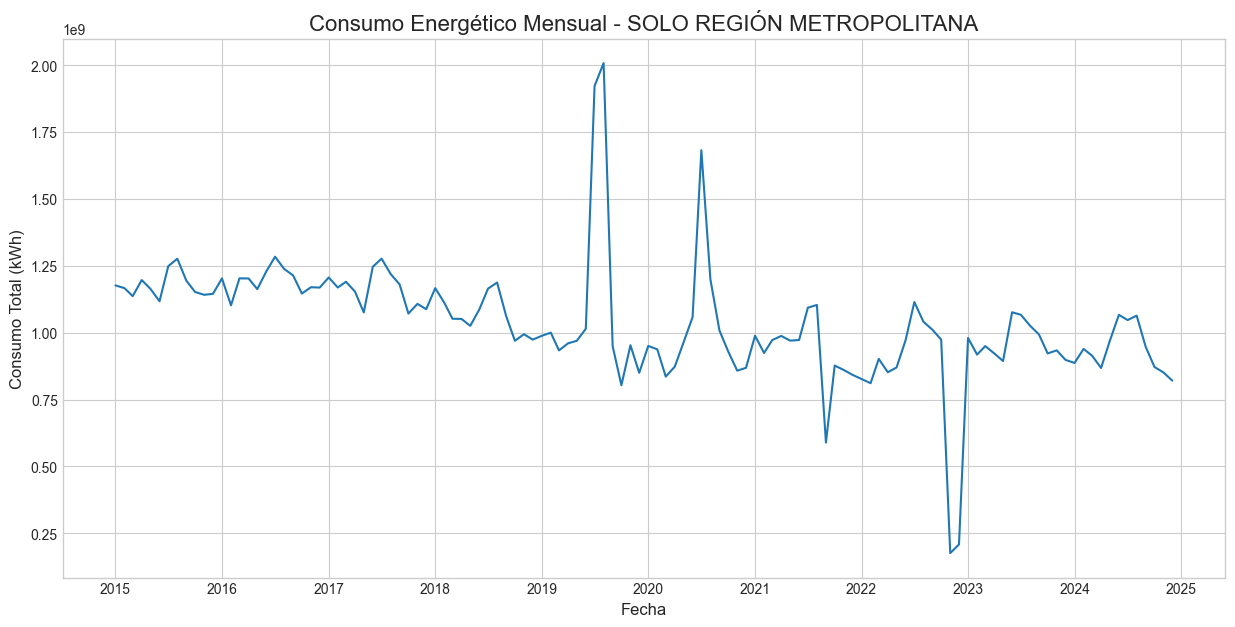

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- ANALIZAR LA TENDENCIA DE CONSUMO (SOLO RM) ---
print("\n--- ANALIZANDO TENDENCIA (SOLO REGIÓN METROPOLITANA) ---")

# Crear columna de fecha (si no existe ya en df_rm)
if 'fecha' not in df_rm.columns:
    df_rm['fecha'] = pd.to_datetime(df_rm['anio'].astype(str) + '-' + df_rm['mes'].astype(str))

# Agrupar por fecha y sumar el consumo
consumo_mensual_rm = df_rm.groupby('fecha')['energia_kwh'].sum().reset_index()

# Visualizar la nueva tendencia
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(data=consumo_mensual_rm, x='fecha', y='energia_kwh', ax=ax)

ax.set_title('Consumo Energético Mensual - SOLO REGIÓN METROPOLITANA', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Consumo Total (kWh)', fontsize=12)
plt.show()

Se observa un ciclo anual muy claro y repetitivo. El consumo aumenta consistentemente durante los meses de invierno y disminuye en los meses de verano. Esto confirma que la temperatura es, sin duda, un factor impulsor clave del consumo energético en la región.

In [25]:
# --- DETECCIÓN DE ANOMALÍAS CON Z-SCORE ---
print("--- IDENTIFICANDO MESES CON CONSUMO ANÓMALO ---")

# Calcular la media y la desviación estándar del consumo mensual
media_consumo = consumo_mensual_rm['energia_kwh'].mean()
std_consumo = consumo_mensual_rm['energia_kwh'].std()

# Calcular el Z-score para cada mes
consumo_mensual_rm['z_score'] = (consumo_mensual_rm['energia_kwh'] - media_consumo) / std_consumo

# Definir un umbral para considerar una anomalía (e.g., 2.5 desviaciones estándar)
umbral_z = 2.5

# Filtrar los meses que superan el umbral
anomalias = consumo_mensual_rm[abs(consumo_mensual_rm['z_score']) > umbral_z]

if not anomalias.empty:
    print(f"\nSe encontraron {len(anomalias)} meses con consumo anómalo (Z-score > {umbral_z}):")
    display(anomalias)
else:
    print(f"\nNo se encontraron anomalías significativas con un umbral de Z-score de {umbral_z}.")

--- IDENTIFICANDO MESES CON CONSUMO ANÓMALO ---

Se encontraron 5 meses con consumo anómalo (Z-score > 2.5):


,fecha,energia_kwh,z_score
54,2019-07-01,1922309422,4.068649
55,2019-08-01,2008209695,4.463890
66,2020-07-01,1682376618,2.964679
94,2022-11-01,175853763,-3.967080
95,2022-12-01,208114007,-3.818645


Dado que el valle de 2022 es casi con seguridad un error en los datos, el siguiente paso ineludible es eliminar esos meses corruptos para no contaminar el análisis y el futuro modelo.

Este código eliminará las filas correspondientes a noviembre y diciembre de 2022 del DataFrame y generará un gráfico final del conjunto de datos limpio y listo para el modelado.

In [26]:
# --- ELIMINAR ANOMALÍAS DE DATOS CORRUPTOS ---
print("--- ELIMINANDO MESES CON DATOS CORRUPTOS (Nov-Dic 2022) ---")

# Filtrar el DataFrame para excluir los meses problemáticos
# El símbolo '~' significa 'NO', por lo que mantenemos todo lo que NO esté en esas fechas.
fechas_a_eliminar = pd.to_datetime(['2022-11-01', '2022-12-01'])
df_final_limpio = df_rm[~df_rm['fecha'].isin(fechas_a_eliminar)].copy()

print(f"DataFrame antes de la limpieza: {len(df_rm)} filas")
print(f"DataFrame después de eliminar anomalías: {len(df_final_limpio)} filas")

--- ELIMINANDO MESES CON DATOS CORRUPTOS (Nov-Dic 2022) ---
DataFrame antes de la limpieza: 74177 filas
DataFrame después de eliminar anomalías: 73662 filas


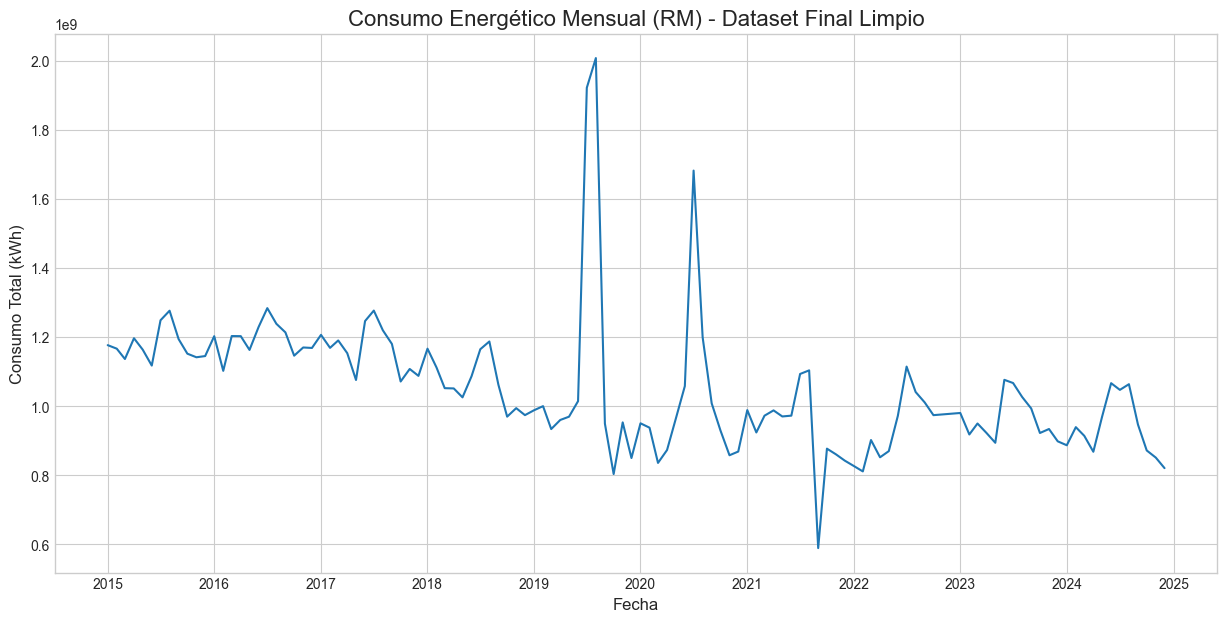

In [27]:
# --- VISUALIZACIÓN FINAL DEL DATASET LIMPIO ---
# Agrupar por fecha y sumar el consumo
consumo_final = df_final_limpio.groupby('fecha')['energia_kwh'].sum().reset_index()

# Visualizar la tendencia final
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(data=consumo_final, x='fecha', y='energia_kwh', ax=ax)

ax.set_title('Consumo Energético Mensual (RM) - Dataset Final Limpio', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Consumo Total (kWh)', fontsize=12)
plt.show()

Ahora que los datos están limpios, el siguiente paso es transformarlos en un formato que un modelo de aprendizaje automático pueda entender y utilizar para hacer predicciones. Esto implica crear nuevas variables (características) a partir de los datos existentes que ayuden a explicar el patrón de consumo.

In [28]:
# --- INGENIERÍA DE CARACTERÍSTICAS: VARIABLES TEMPORALES ---
print("--- CREANDO CARACTERÍSTICAS BASADAS EN EL TIEMPO ---")

# Asegurarse de que la columna 'fecha' es del tipo datetime
df_final_limpio['fecha'] = pd.to_datetime(df_final_limpio['fecha'])

# Crear características temporales
df_final_limpio['mes'] = df_final_limpio['fecha'].dt.month
df_final_limpio['anio'] = df_final_limpio['fecha'].dt.year
df_final_limpio['trimestre'] = df_final_limpio['fecha'].dt.quarter
df_final_limpio['inicio_mes'] = df_final_limpio['fecha'].dt.is_month_start.astype(int)

# Mostrar las primeras filas con las nuevas características
print("\nDataFrame con nuevas características temporales:")
display(df_final_limpio.head())

--- CREANDO CARACTERÍSTICAS BASADAS EN EL TIEMPO ---

DataFrame con nuevas características temporales:


,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh,fecha,trimestre,inicio_mes
973,2015,1,RegiÃ³n Metropolitana de Santiago,MaipÃº,No Residencial,BT4.1,1.0,1415.0,0.0,1415,2015-01-01,1,1
974,2015,1,RegiÃ³n Metropolitana de Santiago,MaipÃº,No Residencial,BT3PPP,55.0,198996.0,0.0,198996,2015-01-01,1,1
975,2015,1,RegiÃ³n Metropolitana de Santiago,MaipÃº,No Residencial,BT3PP,411.0,1635743.0,0.0,1635743,2015-01-01,1,1
976,2015,1,RegiÃ³n Metropolitana de Santiago,MaipÃº,No Residencial,BT4.2,1.0,1915.0,0.0,1915,2015-01-01,1,1
977,2015,1,RegiÃ³n Metropolitana de Santiago,MarÃ­a Pinto,No Residencial,AT2PP,1.0,3127.0,0.0,3127,2015-01-01,1,1


In [29]:
df_final_limpio.sample(10)

,anio,mes,region,comuna,tipo_clientes,tarifa,clientes_facturados,e1_kwh,e2_kwh,energia_kwh,fecha,trimestre,inicio_mes
134754,2017,11,RegiÃ³n Metropolitana de Santiago,Vitacura,No Residencial,BT4.1,1.0,154.0,0.0,154,2017-11-01,4,1
312531,2021,6,RegiÃ³n Metropolitana de Santiago,Pedro Aguirre Cerda,No Residencial,BT4.3,106.0,419122.0,0.0,419122,2021-06-01,2,1
36107,2015,10,RegiÃ³n Metropolitana de Santiago,MarÃ­a Pinto,No Residencial,BT3PP,1.0,2172.0,0.0,2172,2015-10-01,4,1
245382,2020,2,RegiÃ³n Metropolitana de Santiago,Melipilla,No Residencial,BT2PP,13.0,7752.0,0.0,7752,2020-02-01,1,1
272099,2020,8,RegiÃ³n Metropolitana de Santiago,PeÃ±alolÃ©n,No Residencial,AT2PP,1.0,363.0,0.0,363,2020-08-01,3,1
397109,2023,2,RegiÃ³n Metropolitana de Santiago,San Miguel,No Residencial,AT3PPP,15.0,150490.0,0.0,150490,2023-02-01,1,1
55699,2016,3,RegiÃ³n Metropolitana de Santiago,Lo Espejo,Residencial,BT1A,23996.0,5120012.0,1122.0,5121134,2016-03-01,1,1
119117,2017,7,RegiÃ³n Metropolitana de Santiago,Puente Alto,Residencial,BT1A,177297.0,38132895.0,2473367.0,40606262,2017-07-01,3,1
32988,2015,9,RegiÃ³n Metropolitana de Santiago,El Monte,No Residencial,BT3PP,4.0,32357.0,0.0,32357,2015-09-01,3,1
32525,2015,9,RegiÃ³n Metropolitana de Santiago,San RamÃ³n,No Residencial,AT4.3,13.0,688285.0,0.0,688285,2015-09-01,3,1


El siguiente paso es el Modelado.

Ahora que los datos están limpios y enriquecidos con características temporales, es momento de utilizar esta información para entrenar un modelo predictivo. Siguiendo la propuesta de proyecto, comenzaremos con el modelo más simple y útil como punto de referencia: la Regresión Lineal Múltiple.

El objetivo de este paso es crear un modelo base que nos diga qué tan bien podemos predecir el consumo de energía (``energia_kwh``) utilizando las características que hemos preparado. Este modelo nos servirá como una línea de base para comparar modelos más complejos en el futuro.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("--- FASE DE MODELADO: REGRESIÓN LINEAL BASE ---")

# --- 1. Selección de Características y Variable Objetivo ---
# Variable objetivo (lo que queremos predecir)
y = df_final_limpio['energia_kwh']

# Características (las variables que usaremos para predecir)
# Por ahora, usaremos solo las características temporales que creamos.
X = df_final_limpio[['anio', 'mes', 'trimestre', 'inicio_mes']]

print("Características seleccionadas para el modelo:", X.columns.tolist())

# --- 2. División de Datos (Entrenamiento y Prueba) ---
# Dividimos los datos: 80% para entrenar, 20% para probar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDatos de entrenamiento: {len(X_train)} filas")
print(f"Datos de prueba: {len(X_test)} filas")

# --- 3. Entrenamiento del Modelo de Regresión Lineal ---
# Crear y entrenar el modelo
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

print("\n¡Modelo de Regresión Lineal entrenado exitosamente!")

# --- 4. Evaluación del Modelo Base ---
# Realizar predicciones en el conjunto de prueba
predicciones = modelo_lineal.predict(X_test)

# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)

print("\n--- RENDIMIENTO DEL MODELO BASE ---")
print(f"Error Cuadrático Medio (MSE): {mse:,.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

--- FASE DE MODELADO: REGRESIÓN LINEAL BASE ---
Características seleccionadas para el modelo: ['anio', 'mes', 'trimestre', 'inicio_mes']

Datos de entrenamiento: 58929 filas
Datos de prueba: 14733 filas

¡Modelo de Regresión Lineal entrenado exitosamente!

--- RENDIMIENTO DEL MODELO BASE ---
Error Cuadrático Medio (MSE): 19,924,025,027,616.63
Coeficiente de Determinación (R²): 0.00


El Coeficiente de Determinación (R²) de 0.00 es el resultado más importante.

Esto indica que el modelo base, utilizando únicamente características de tiempo, no tiene absolutamente ningún poder predictivo. Es formalmente inútil. Explica el 0% de la variabilidad en el consumo de energía, lo que significa que no es mejor que simplemente adivinar el consumo promedio de todos los tiempos para cada predicción.

Para que el modelo entienda las diferencias entre comunas, debemos convertir la columna categórica comuna en un formato numérico. La técnica estándar para esto es One-Hot Encoding. Este método crea una nueva columna binaria (0 o 1) para cada comuna, permitiendo que el modelo aprenda un "peso" o coeficiente específico para cada una.

In [31]:
print("--- MEJORANDO EL MODELO CON ONE-HOT ENCODING DE 'comuna' ---")

# --- 1. Crear el DataFrame para el modelo ---
# Seleccionamos las características, incluyendo la categórica 'comuna'
features = ['anio', 'mes', 'trimestre', 'comuna']
df_model = df_final_limpio[features + ['energia_kwh']].copy()

# --- 2. Aplicar One-Hot Encoding ---
# pandas.get_dummies convierte la columna 'comuna' en múltiples columnas binarias
X_encoded = pd.get_dummies(df_model[features], columns=['comuna'], drop_first=True)

y = df_model['energia_kwh']

print("DataFrame transformado con One-Hot Encoding.")
print(f"Número de características después de la codificación: {X_encoded.shape[1]}")

# --- 3. Re-entrenar y Re-evaluar el Modelo ---
# Dividir los nuevos datos
X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Entrenar el modelo con las nuevas características
modelo_lineal_mejorado = LinearRegression()
modelo_lineal_mejorado.fit(X_train_enc, y_train)

print("\n¡Modelo mejorado entrenado exitosamente!")

# Evaluar el nuevo modelo
predicciones_mejoradas = modelo_lineal_mejorado.predict(X_test_enc)
r2_mejorado = r2_score(y_test, predicciones_mejoradas)

print("\n--- RENDIMIENTO DEL MODELO MEJORADO ---")
print(f"Nuevo Coeficiente de Determinación (R²): {r2_mejorado:.2f}")

--- MEJORANDO EL MODELO CON ONE-HOT ENCODING DE 'comuna' ---
DataFrame transformado con One-Hot Encoding.
Número de características después de la codificación: 54

¡Modelo mejorado entrenado exitosamente!

--- RENDIMIENTO DEL MODELO MEJORADO ---
Nuevo Coeficiente de Determinación (R²): 0.10


El R² de 0.10 es un salto cuántico comparado con el 0.00 anterior. Este resultado valida una hipótesis fundamental: la ubicación (comuna) es un factor predictivo clave.

Sin embargo, un R² de 0.10 sigue siendo bajo. Significa que, aunque el modelo ha mejorado, todavía hay un 90% de la variabilidad en el consumo de energía que no podemos explicar.

El modelo actual sabe cuándo y dónde ocurre el consumo, pero no tiene información sobre el contexto que impulsa ese consumo. Como se planteó en tu propuesta de proyecto, nos faltan dos piezas críticas de información:

Datos Climáticos: Ya vimos una fuerte estacionalidad, lo que sugiere que la temperatura es un factor determinante.

Datos Socioeconómicos: El ingreso y el tamaño de los hogares probablemente influyen en la capacidad y necesidad de consumo.

De estos dos, los datos climáticos son el siguiente paso lógico porque su impacto es más directo e inmediato sobre el consumo residencial (calefacción/refrigeración).

## **2. Datos climáticos**

Este bloque se encargará de cargar los datos climáticos, procesarlos y fusionarlos con tu DataFrame de consumo.

In [33]:
# --- FUSIONANDO CON DATOS CLIMÁTICOS ---
print("--- INTEGRANDO DATOS CLIMÁTICOS ---")

ruta = "../data/processed/datos_meteorologicos_semi-limpios.csv"

df_temperaturas = pd.read_csv(ruta)
display(df_temperaturas.head())
display(df_temperaturas.tail())

--- INTEGRANDO DATOS CLIMÁTICOS ---


,Fecha,Temp_Promedio,Temp_Maxima,Temp_Minima
0,2015-01-01,21.150000,30.2,14.6
1,2015-01-02,22.408333,32.6,14.1
2,2015-01-03,22.991667,29.8,12.1
3,2015-01-04,23.950000,30.6,10.5
4,2015-01-05,22.854167,19.4,10.9


,Fecha,Temp_Promedio,Temp_Maxima,Temp_Minima
3933,2025-10-09,18.733333,22.3,7.6
3934,2025-10-10,16.650000,22.0,10.9
3935,2025-10-11,14.312500,22.4,8.9
3936,2025-10-12,15.658333,26.5,5.9
3937,2025-10-13,17.358333,27.7,8.2


In [47]:
df_temperaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3938 entries, 0 to 3937
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          3938 non-null   datetime64[ns]
 1   Temp_Promedio  3938 non-null   float64       
 2   Temp_Maxima    3938 non-null   float64       
 3   Temp_Minima    3938 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 123.2 KB


Notemos que el dataframe no contiene datos nulos y el tipo de dato es correcto para cada columna

In [34]:
df_temperaturas.describe()

,Temp_Promedio,Temp_Maxima,Temp_Minima
count,3938.000000,3938.000000,3938.000000
mean,15.459041,23.959396,8.560386
std,5.209217,6.540864,4.186961
min,3.520833,7.200000,-3.000000
25%,11.033333,18.600000,5.500000
50%,15.345833,24.600000,8.900000
75%,20.110417,29.500000,12.000000
max,26.650000,38.300000,19.500000


In [35]:
nulos = df_temperaturas.isnull().sum()
print(nulos)

Fecha            0
Temp_Promedio    0
Temp_Maxima      0
Temp_Minima      0
dtype: int64


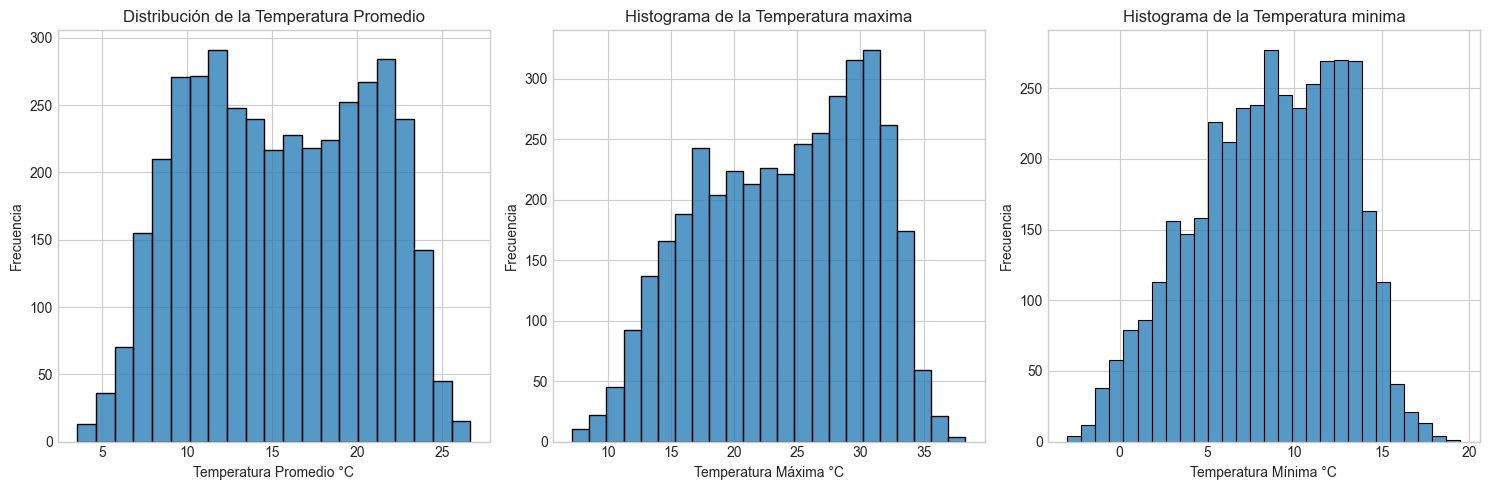

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df_temperaturas["Temp_Promedio"], ax=axes[0])
axes[0].set_title("Distribución de la Temperatura Promedio")
axes[0].set_xlabel("Temperatura Promedio °C")
axes[0].set_ylabel("Frecuencia")

sns.histplot(df_temperaturas["Temp_Maxima"], ax=axes[1])
axes[1].set_title("Histograma de la Temperatura maxima")
axes[1].set_xlabel("Temperatura Máxima °C")
axes[1].set_ylabel("Frecuencia")

sns.histplot(df_temperaturas["Temp_Minima"], ax=axes[2])
axes[2].set_title("Histograma de la Temperatura minima")
axes[2].set_xlabel("Temperatura Mínima °C")
axes[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

               Temp_Promedio  Temp_Maxima  Temp_Minima
Temp_Promedio       1.000000     0.555620     0.531517
Temp_Maxima         0.555620     1.000000     0.643031
Temp_Minima         0.531517     0.643031     1.000000


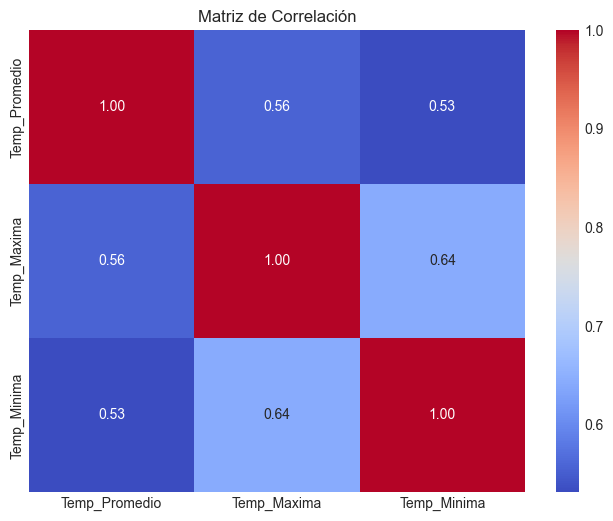

In [40]:
columnas_numericas = df_temperaturas[['Temp_Promedio', 'Temp_Maxima', 'Temp_Minima']]
corr = columnas_numericas.corr()
print(corr)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

las temperaturas máxima y mínima parecen estar relacionadas, pero la temperatura promedio tiene una relación más moderada tanto con la máxima como con la mínima.

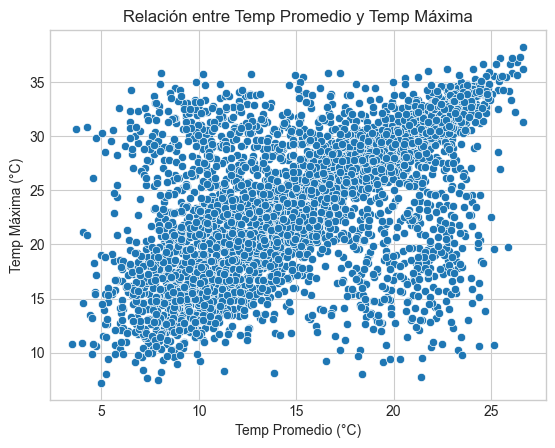

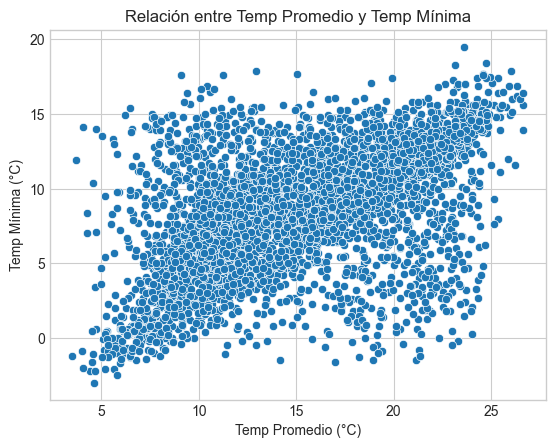

In [42]:
sns.scatterplot(x=df_temperaturas["Temp_Promedio"], y=df_temperaturas["Temp_Maxima"])
plt.title("Relación entre Temp Promedio y Temp Máxima")
plt.xlabel("Temp Promedio (°C)")
plt.ylabel("Temp Máxima (°C)")
plt.show()

# Relación entre Temp_Promedio y Temp_Minima
sns.scatterplot(x=df_temperaturas["Temp_Promedio"], y=df_temperaturas["Temp_Minima"])
plt.title("Relación entre Temp Promedio y Temp Mínima")
plt.xlabel("Temp Promedio (°C)")
plt.ylabel("Temp Mínima (°C)")
plt.show()

Ambos gráficos demuestran que tanto la temperatura máxima como la mínima de un día están directamente relacionadas con la temperatura promedio de ese mismo día. Si la temperatura promedio sube, es muy probable que tanto la máxima como la mínima también lo hagan.

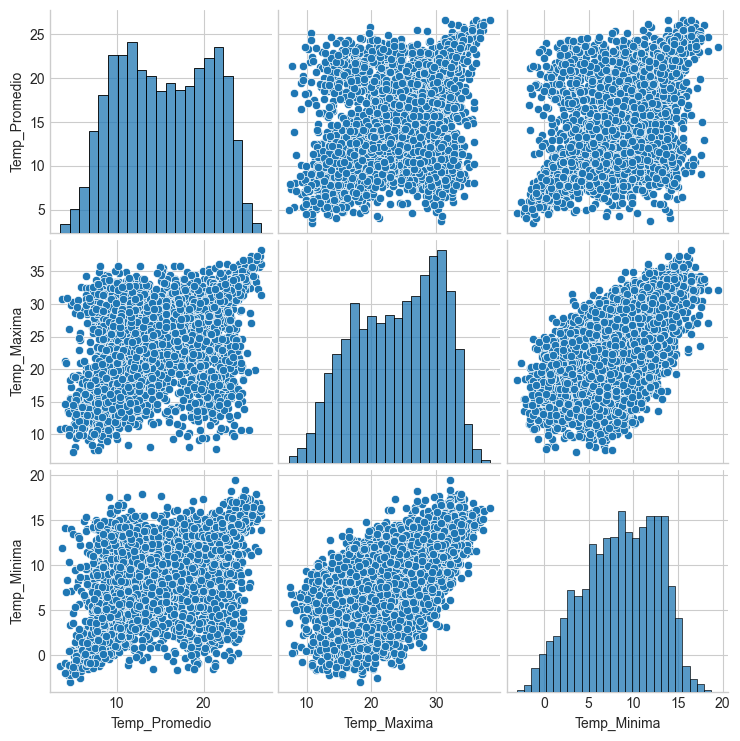

In [43]:
sns.pairplot(df_temperaturas[["Temp_Promedio", "Temp_Maxima", "Temp_Minima"]])
plt.show()

estos gráficos nos permiten concluir que las tres variables de temperatura (promedio, máxima y mínima) están fuertemente correlacionadas entre sí. Cuando una de ellas aumenta, las otras dos también tienden a hacerlo.

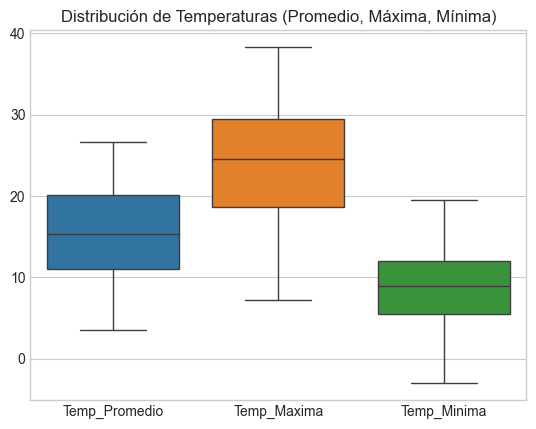

In [45]:
sns.boxplot(data=df_temperaturas[["Temp_Promedio", "Temp_Maxima", "Temp_Minima"]])
plt.title("Distribución de Temperaturas (Promedio, Máxima, Mínima)")
plt.show()

El gráfico de cajas muestra claramente cómo se comparan las distribuciones de las temperaturas. La Temp_Maxima es la más variable y alta, mientras que la Temp_Minima es la menos variable y más baja. La Temp_Promedio se sitúa, como es de esperar, en una posición intermedia en cuanto a valor y dispersión

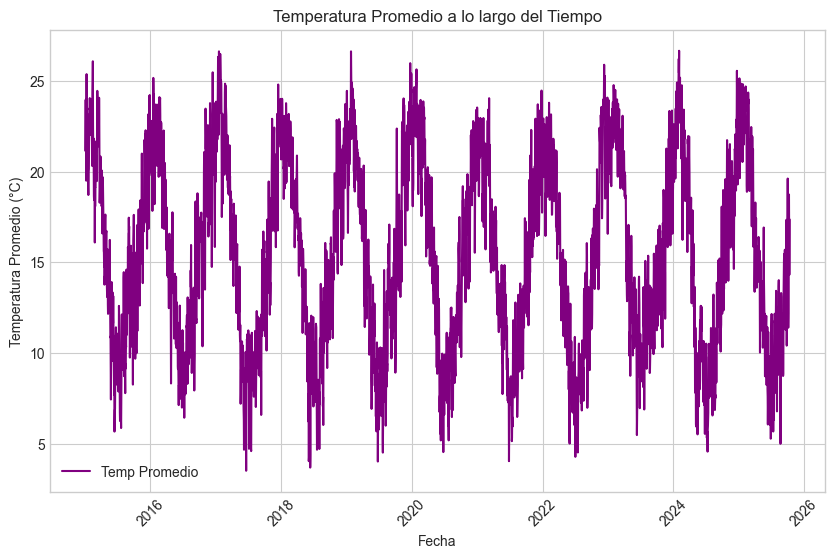

In [46]:
df_temperaturas["Fecha"] = pd.to_datetime(df_temperaturas["Fecha"])

# Gráfico de línea para visualizar la temperatura promedio a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_temperaturas["Fecha"], df_temperaturas["Temp_Promedio"], label="Temp Promedio", color="purple")
plt.title("Temperatura Promedio a lo largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("Temperatura Promedio (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

El gráfico ilustra de manera efectiva el ciclo estacional de las temperaturas en la ubicación de donde provienen los datos. Muestra una clara y predecible fluctuación anual, subiendo en verano y bajando en invierno, un comportamiento típico del clima en zonas con estaciones bien definidas como lo es la Región Metropolitana